In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [3]:
data_path = 'Online_Retail.xlsx'
Online_Retail = pd.read_excel(data_path)

In [5]:
missing_values = Online_Retail.isnull().sum()
missing_values_percentage = (Online_Retail.isnull().sum() / len(Online_Retail) * 100)

missing_values_df = pd.DataFrame({"Missing Values": missing_values,"Missing Values in Percentage (%)": missing_values_percentage})
missing_values_df = missing_values_df[missing_values_df["Missing Values"] > 0]
print(missing_values_df)

             Missing Values  Missing Values in Percentage (%)
Description            1454                          0.268311
CustomerID           135080                         24.926694


In [7]:

# Detecting binary columns and converting them to 'category' dtype

for column in Online_Retail.columns:
    if Online_Retail[column].nunique() == 2:  # Checking if the column has exactly two unique values
        Online_Retail[column] = Online_Retail[column].astype('category')

# Now describe the data separately for categorical and numerical data
categorical_cols = Online_Retail.select_dtypes(include=['object', 'category']).columns
numeric_cols = Online_Retail.select_dtypes(include=['float64', 'int64']).columns

# Descriptive statistics for categorical and numeric columns
categorical_stats = Online_Retail[categorical_cols].describe()
numeric_stats = Online_Retail[numeric_cols].describe()

print("________________________________________________________________________________")
print("\nNumeric Column Stats:")
display(numeric_stats.style.format("{:.2f}"))
print("________________________________________________________________________________")

print("\nCategorical Column Stats:")
display(categorical_stats)
print("________________________________________________________________________________")

________________________________________________________________________________

Numeric Column Stats:


,Quantity,UnitPrice,CustomerID
count,541909.00,541909.00,406829.00
mean,9.55,4.61,15287.69
std,218.08,96.76,1713.60
min,-80995.00,-11062.06,12346.00
25%,1.00,1.25,13953.00
50%,3.00,2.08,15152.00
75%,10.00,4.13,16791.00
max,80995.00,38970.00,18287.00


________________________________________________________________________________

Categorical Column Stats:


,InvoiceNo,StockCode,Description,Country
count,541909,541909,540455,541909
unique,25900,4070,4223,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,1114,2313,2369,495478


________________________________________________________________________________


In [9]:
# missing_value treatment

Online_Retail= Online_Retail.dropna(subset=['CustomerID', 'Description'])


# Display summary to verify changes
print(Online_Retail.isnull().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


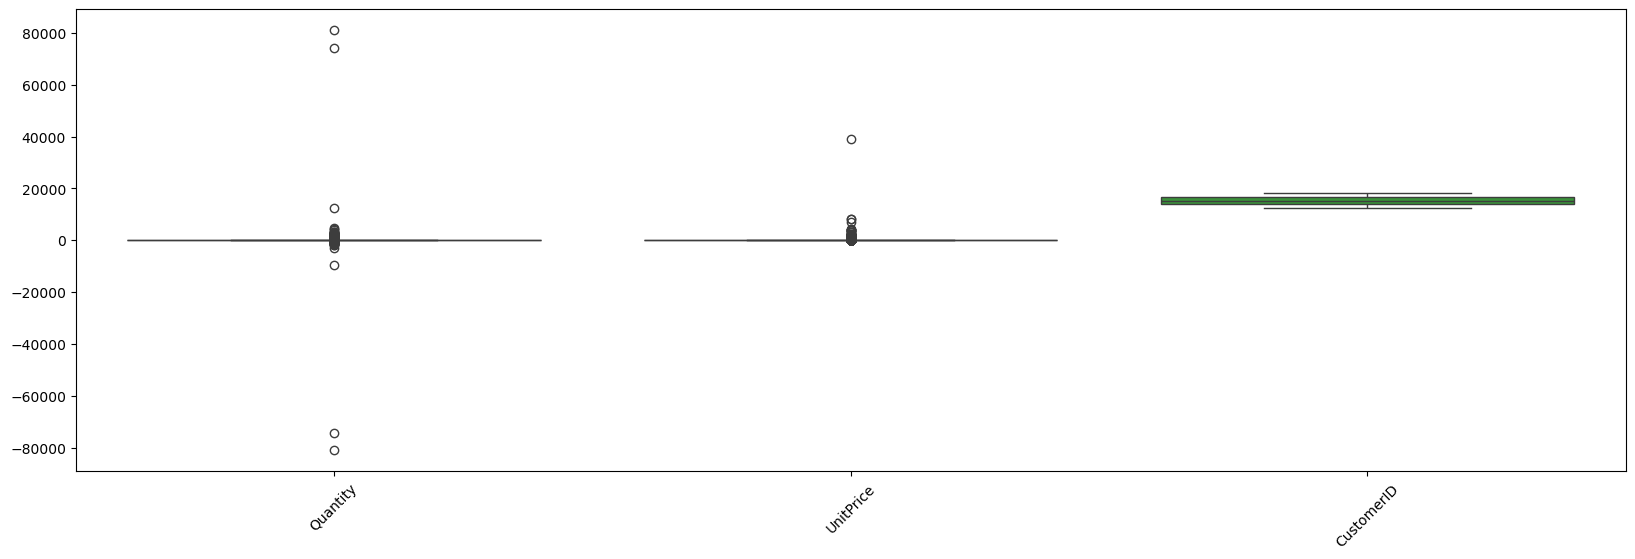

In [11]:
#before outlayer treatment
sns.boxplot(data= Online_Retail)
plt.gcf().set_size_inches(20,6) 
plt.xticks(rotation= 45)
plt.show()

In [13]:
# Outlier Treatment - Winsorization using IQR
column = 'Quantity' 

q1 = Online_Retail[column].quantile(0.25)
q3 = Online_Retail[column].quantile(0.75)
iqr = q3 - q1
lf = q1 - 1.5 * iqr  # Lower fence
uf = q3 + 1.5 * iqr  # Upper fence
Online_Retail.loc[Online_Retail[column] < lf, column] = lf
Online_Retail.loc[Online_Retail[column] > uf, column] = uf


In [15]:
# Outlier Treatment - Winsorization using IQR
column = 'UnitPrice' 

q1 = Online_Retail[column].quantile(0.25)
q3 = Online_Retail[column].quantile(0.75)
iqr = q3 - q1
lf = q1 - 1.5 * iqr  # Lower fence
uf = q3 + 1.5 * iqr  # Upper fence
Online_Retail.loc[Online_Retail[column] < lf, column] = lf
Online_Retail.loc[Online_Retail[column] > uf, column] = uf


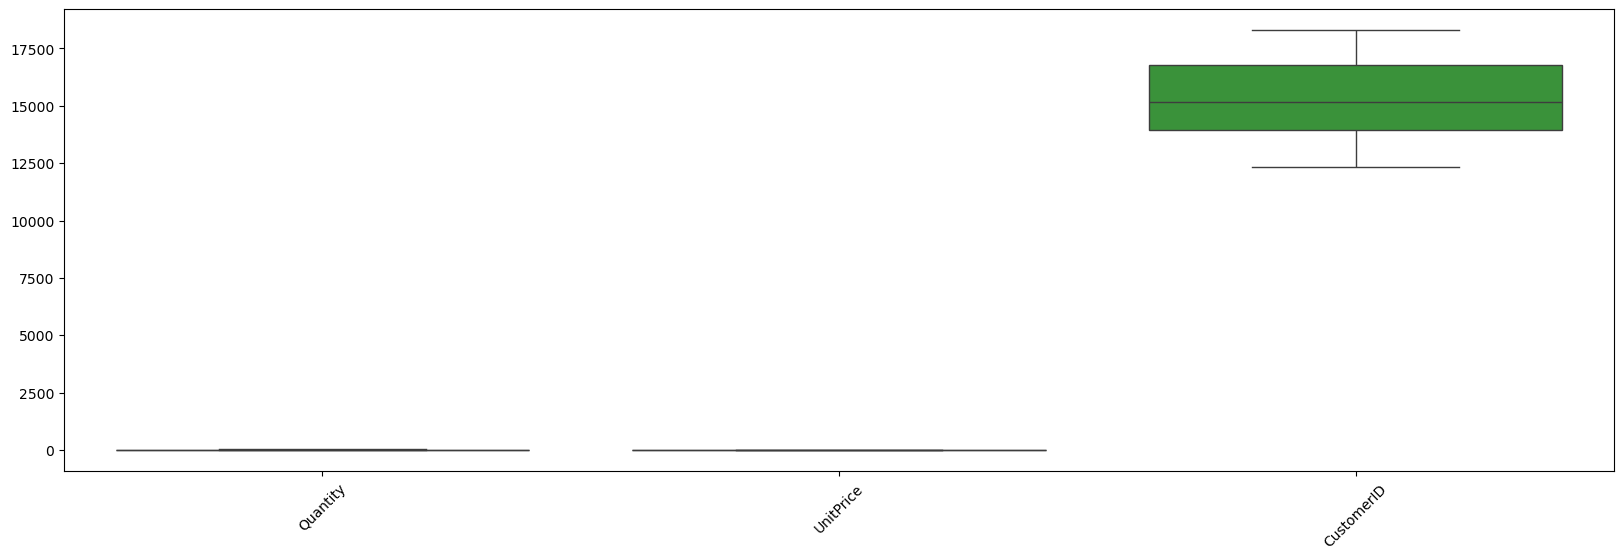

In [17]:
#after outlayer treatment
sns.boxplot(data= Online_Retail)
plt.gcf().set_size_inches(20,6) 
plt.xticks(rotation= 45)
plt.show()

#cleaned Data exported
Online_Retail.to_csv("cleaned_Online_Retail.csv", index=False)  
print("Data exported successfully")

In [18]:
# Convert InvoiceDate to datetime format
Online_Retail['InvoiceDate'] = pd.to_datetime(Online_Retail['InvoiceDate'])

# Convert CustomerID to integer after handling missing values
Online_Retail['CustomerID'] = Online_Retail['CustomerID'].astype(int)

# Create a flag for cancellations (1 if cancelled, 0 otherwise)
Online_Retail['IsCancelled'] = Online_Retail['InvoiceNo'].apply(lambda x: 1 if str(x).startswith('C') else 0)

# Compute total sales per transaction
Online_Retail['TotalSales'] = Online_Retail['Quantity'] * Online_Retail['UnitPrice']

# Display the updated dataset structure and first few rows
print(Online_Retail.info())
Online_Retail.head()


<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  int32         
 7   Country      406829 non-null  object        
 8   IsCancelled  406829 non-null  int64         
 9   TotalSales   406829 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(1), int64(2), object(4)
memory usage: 32.6+ MB
None


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,IsCancelled,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34


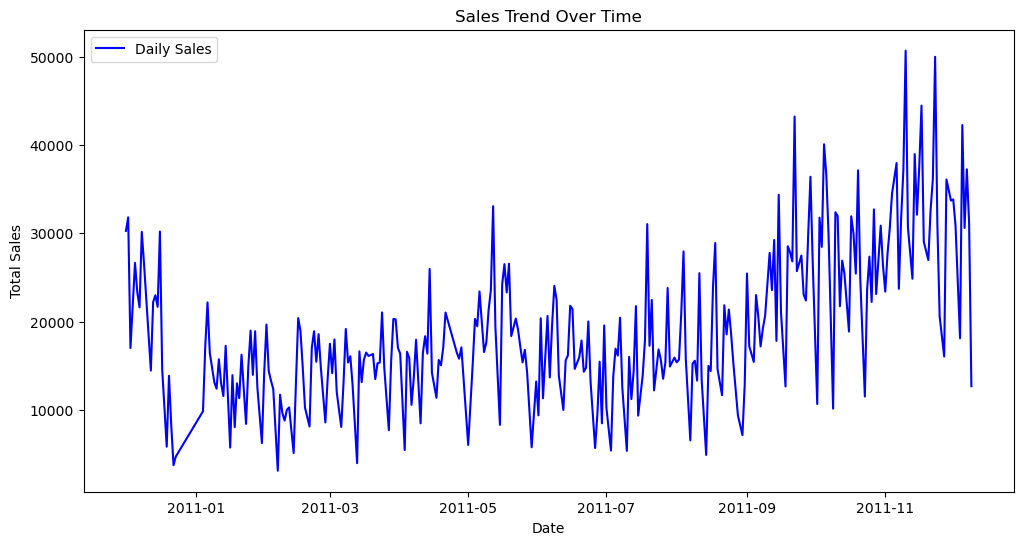

In [21]:
# Sales Trends Over Time (Daily, Weekly, Monthly)
# This analysis will show the total sales over time to identify trends and seasonality.



# Aggregate sales per day
daily_sales = Online_Retail.groupby(Online_Retail['InvoiceDate'].dt.date)['TotalSales'].sum()

# Plot the sales trend
plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales.values, label='Daily Sales', color='blue')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Sales Trend Over Time')
plt.legend()
plt.show()


In [23]:
# Top-Selling & Least-Selling Products
# Identifies the best and worst-performing products based on sales.
# Top Selling Products
top_products = Online_Retail.groupby('Description')['TotalSales'].sum().sort_values(ascending=False).head(10).reset_index()
top_products_df = pd.DataFrame(top_products)

# Least Selling Products
least_products = Online_Retail.groupby('Description')['TotalSales'].sum().sort_values(ascending=True).head(10).reset_index()
least_products_df = pd.DataFrame(least_products)

# Display the results
print("Top Selling Products:\n", top_products_df)
print("\nLeast Selling Products:\n", least_products_df)


Top Selling Products:
                           Description  TotalSales
0            REGENCY CAKESTAND 3 TIER    69242.50
1  WHITE HANGING HEART T-LIGHT HOLDER    55523.33
2                       PARTY BUNTING    47818.78
3             JUMBO BAG RED RETROSPOT    38770.32
4       ASSORTED COLOUR BIRD ORNAMENT    34043.27
5                      SPOTTY BUNTING    27925.88
6                       CHILLI LIGHTS    27308.28
7     PAPER CHAIN KIT 50'S CHRISTMAS     26825.14
8            JAM MAKING SET WITH JARS    25122.42
9       DOORMAT KEEP CALM AND COME IN    24306.30

Least Selling Products:
                        Description  TotalSales
0                         Discount     -567.83
1                  CRUK Commission     -114.10
2              WHITE CHERRY LIGHTS      -54.00
3      WOODEN BOX ADVENT CALENDAR       -45.00
4     CHALKBOARD KITCHEN ORGANISER      -30.00
5               PINK CHERRY LIGHTS      -27.00
6          BLUE PADDED SOFT MOBILE      -25.50
7   CREAM SWEETHEART MAGA

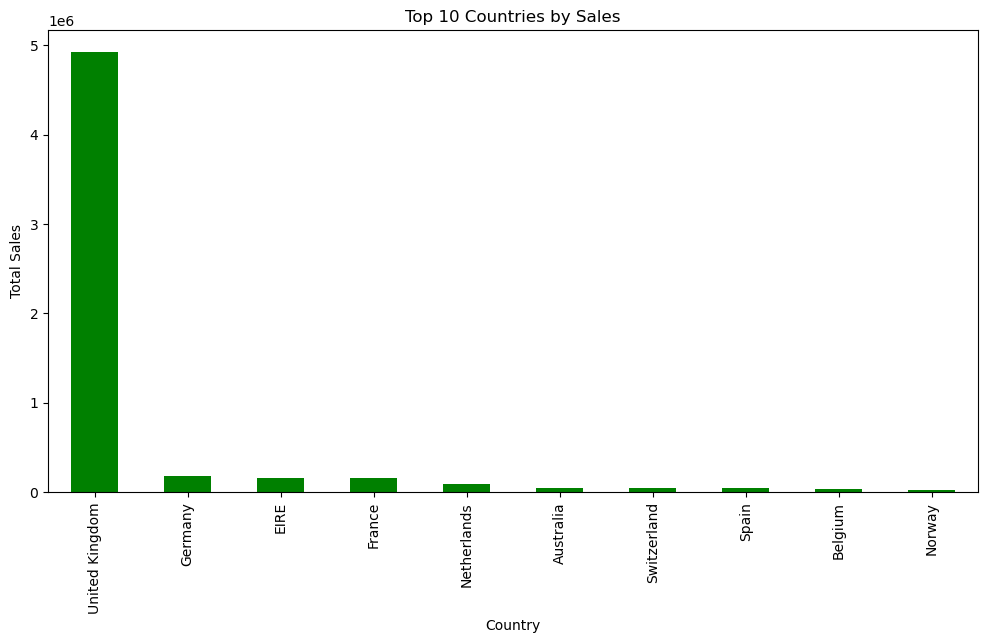

In [25]:
#Country-wise Sales Distribution
#This helps understand the revenue contribution by country.

# Aggregate sales by country
country_sales = Online_Retail.groupby('Country')['TotalSales'].sum().sort_values(ascending=False)
country_salesdf = pd.DataFrame(country_sales)
# Display data


# Plot the sales by country
plt.figure(figsize=(12, 6))
country_sales[:10].plot(kind='bar', color='green')  # Top 10 countries
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.title('Top 10 Countries by Sales')
plt.show()


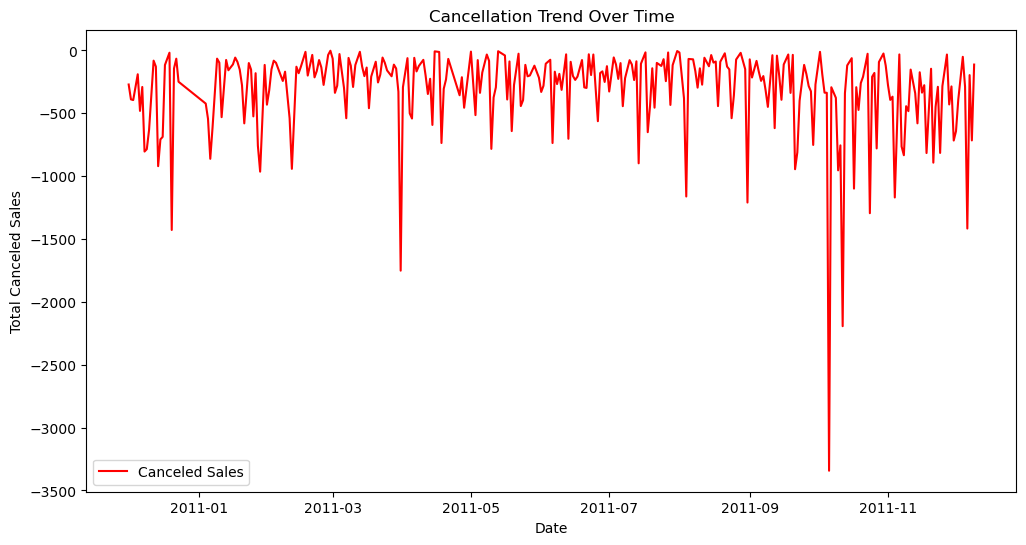

Total Cancellation Rate: 2.19%


In [27]:
#Cancellation Trends
#Analyzes canceled transactions to detect patterns.

# Cancellation rate
cancellation_rate = Online_Retail['IsCancelled'].mean() * 100

# Canceled transactions by date
canceled_orders = Online_Retail[Online_Retail['IsCancelled'] == 1].groupby(Online_Retail['InvoiceDate'].dt.date)['TotalSales'].sum()

# Plot cancellations over time
plt.figure(figsize=(12, 6))
plt.plot(canceled_orders.index, canceled_orders.values, label='Canceled Sales', color='red')
plt.xlabel('Date')
plt.ylabel('Total Canceled Sales')
plt.title('Cancellation Trend Over Time')
plt.legend()
plt.show()

# Display cancellation statistics
print(f"Total Cancellation Rate: {cancellation_rate:.2f}%")


In [37]:
# Reference date for Recency calculation (Assuming max date in dataset)
reference_date = Online_Retail['InvoiceDate'].max()

# Compute RFM metrics
rfm = Online_Retail.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',  # Frequency (Unique transactions)
    'TotalSales': 'sum'  # Monetary Value (Total spend)
})

# Rename columns
rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm = rfm.reset_index()

# Handle zero and negative monetary values before log transformation
rfm['Monetary'] = rfm['Monetary'].apply(lambda x: np.log1p(x) if x > 0 else 0)

In [43]:
# Standardizing RFM values before clustering
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

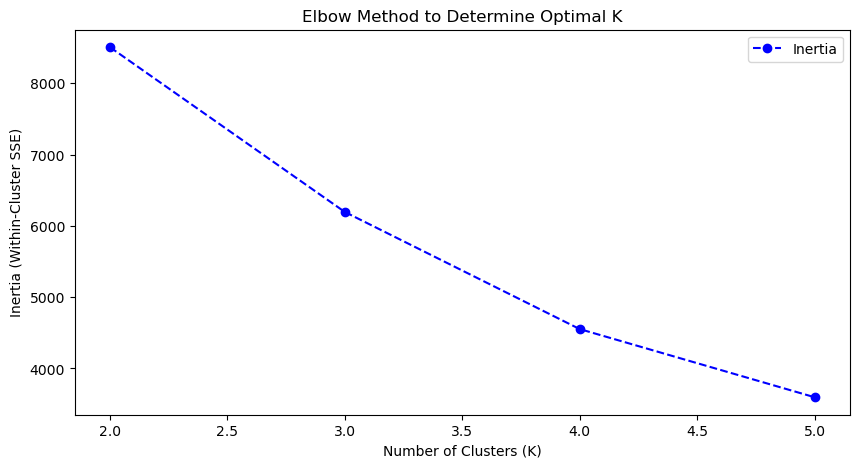

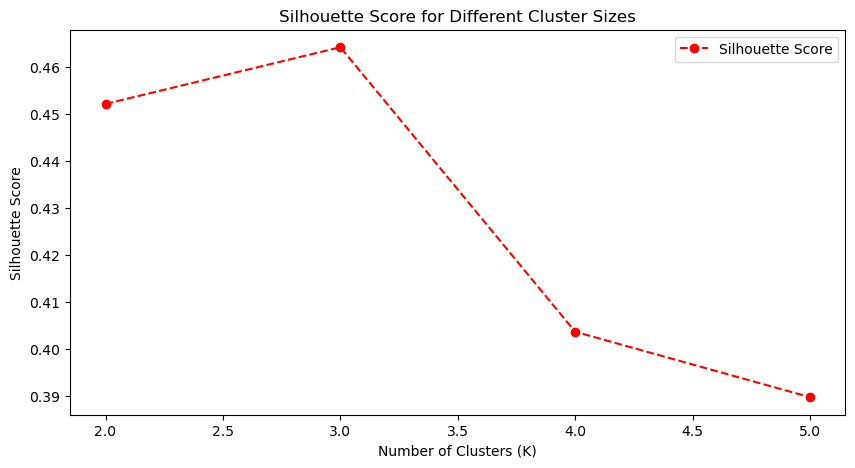

Optimal number of clusters based on Silhouette Score: 3


In [45]:
# Finding optimal K using the Elbow Method and Silhouette Score
inertia = []
silhouette_scores = []
K_range = range(2, 6) 

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(rfm_scaled, kmeans.labels_))
    # Plot Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--', color='blue', label='Inertia')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-Cluster SSE)')
plt.title('Elbow Method to Determine Optimal K')
plt.legend()
plt.show()

# Plot Silhouette Score
plt.figure(figsize=(10, 5))
plt.plot(K_range, silhouette_scores, marker='o', linestyle='--', color='red', label='Silhouette Score')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Cluster Sizes')
plt.legend()
plt.show()
# Selecting optimal K based on Silhouette Score
optimal_k = K_range[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters based on Silhouette Score: {optimal_k}")


K-Means Cluster Distribution:
Cluster_KMeans
0    2889
1    1105
2     378
Name: count, dtype: int64
Hierarchical Clustering Distribution:
Cluster_HC
2    1725
0    1581
1    1066
Name: count, dtype: int64


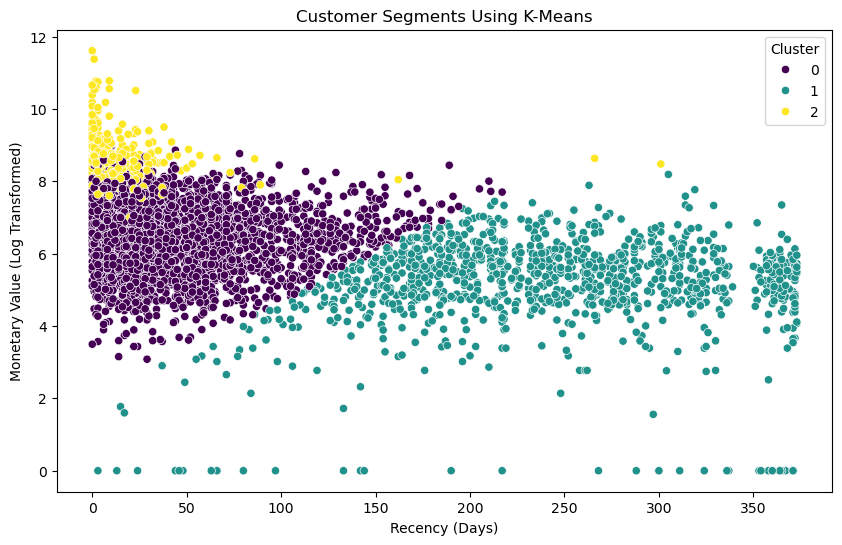

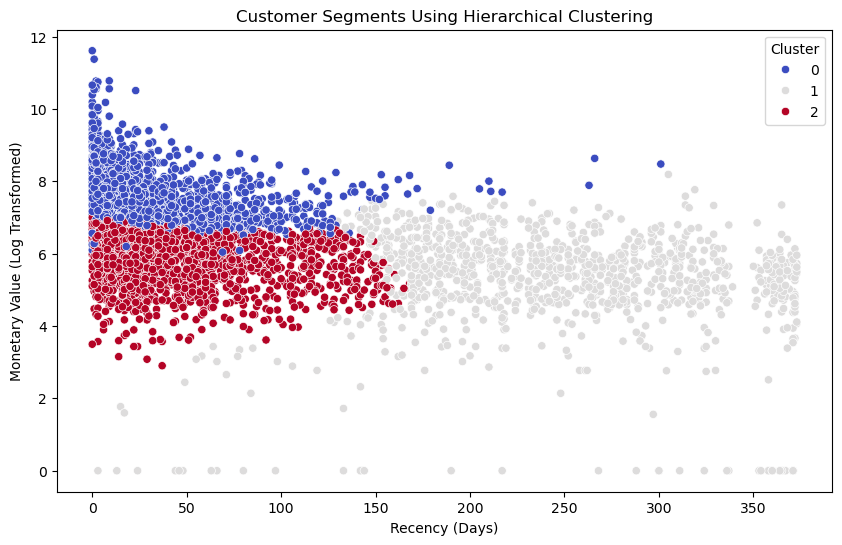

   CustomerID  Recency  Frequency  Monetary  Cluster_KMeans  Cluster_HC
0       12346      325          2  2.744704               1           1
1       12347        1          7  8.263188               0           0
2       12348       74          4  6.325380               0           2
3       12349       18          1  7.198670               0           0
4       12350      309          1  5.713403               1           1


In [51]:
# Apply K-Means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
rfm['Cluster_KMeans'] = kmeans.fit_predict(rfm_scaled)

# Checking cluster distribution
print("K-Means Cluster Distribution:")
print(rfm['Cluster_KMeans'].value_counts())

# Alternative: Hierarchical Clustering
hc = AgglomerativeClustering(n_clusters=optimal_k)
rfm['Cluster_HC'] = hc.fit_predict(rfm_scaled)

# Checking cluster distribution for Hierarchical Clustering
print("Hierarchical Clustering Distribution:")
print(rfm['Cluster_HC'].value_counts())

# Visualizing the clusters (K-Means)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=rfm['Recency'], y=rfm['Monetary'], hue=rfm['Cluster_KMeans'], palette='viridis')
plt.xlabel('Recency (Days)')
plt.ylabel('Monetary Value (Log Transformed)')
plt.title('Customer Segments Using K-Means')
plt.legend(title='Cluster')
plt.show()

# Visualizing the clusters (Hierarchical Clustering)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=rfm['Recency'], y=rfm['Monetary'], hue=rfm['Cluster_HC'], palette='coolwarm')
plt.xlabel('Recency (Days)')
plt.ylabel('Monetary Value (Log Transformed)')
plt.title('Customer Segments Using Hierarchical Clustering')
plt.legend(title='Cluster')
plt.show()

# Display RFM analysis with clusters
print(rfm.head())


In [53]:
silhouette_avg = silhouette_score(rfm_scaled, rfm['Cluster_KMeans'])
print(f"Silhouette Score: {silhouette_avg:.4f}")

Silhouette Score: 0.4642
